In [1]:
from gradients import *

In [29]:
SUBJECTS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33,
35, 36, 38, 39, 40, 42, 43, 44, 45, 46, ]
# excluded subjects: 41, 19, 32, 27, 34, 37,

In [24]:
EPICS = ['rs', 'baseline', 'lrn', 'lrn_early', 'lrn_late']

In [51]:
NUM_COMPONENTS = 4


# try a global reference
changed rest to baseline

In [30]:
data_rs = load_data(subj=1, cond='rest')
# just took a subj to make atlas
surf_labels, mask_removed = load_atlas(data_rs)
# make average corr_mat

In [33]:
global_corr_mat = np.zeros((998, 998))
for s in SUBJECTS:
    data_baseline = load_data(subj=s, cond='RLbaseline')
    global_corr_mat += make_mat(data_baseline)
global_corr_mat /= len(SUBJECTS)

<AxesSubplot:>

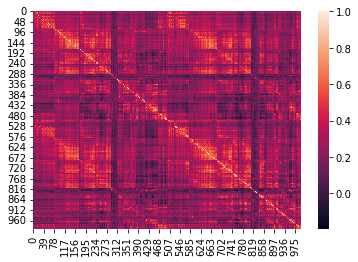

In [34]:
import seaborn as sns

sns.heatmap(global_corr_mat)

In [36]:
# make the global gradient model
DIM_RED_APPROACH = 'pca'
global_gradient_reference = GradientMaps(random_state=0, approach=DIM_RED_APPROACH)
global_gradient_reference.fit(global_corr_mat, sparsity=0.9)
#todo ? sparsity

GradientMaps(approach='pca', random_state=0)

In [52]:
grads = [{k:{} for k in EPICS} for _ in range(NUM_COMPONENTS)]

for subject in SUBJECTS:
    gm = make_gradients(subj=subject, gm_ref=global_gradient_reference)
    for component in range(NUM_COMPONENTS):
        for epic in EPICS:
            grad = gm.aligned_[EPICS.index(epic)][:, component]
            grads[component][epic][subject] = grad

In [60]:
mean_grads = [{} for _ in range(NUM_COMPONENTS)]

for component in range(NUM_COMPONENTS):
    for epic in EPICS:
        mean_grad_epic = np.mean([v for k, v in grads[component][epic].items()], axis=0)
        mean_grads[component][epic] = mean_grad_epic

---

# gradients (all global referenced)


In [67]:
def get_gradient_component(component_num=1):
    # component_num starting from one
    component_num -= 1

    grad_aligned_epics = {}

    for epic in EPICS:
        grad_aligned_epics[epic] = map_to_labels(mean_grads[component_num][epic],
        surf_labels, mask=mask_removed, fill=np.nan)

    data = [grad_aligned_epics[epic] for epic in EPICS]
    texts = EPICS
    color_maps = ['viridis_r'] * len(EPICS)
    z = zip(data, texts, color_maps)

    component_num += 1
    for data_to_show, text_bar, color_map in z:
        stack_surfplot(data_to_show, 'Gradient ' + str(component_num) + ' - ' + text_bar, color_map)

## gradient 1

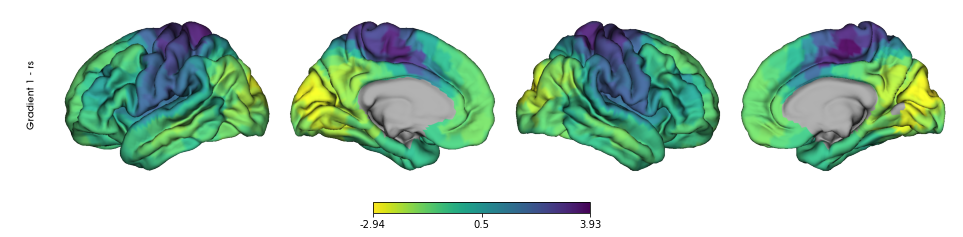

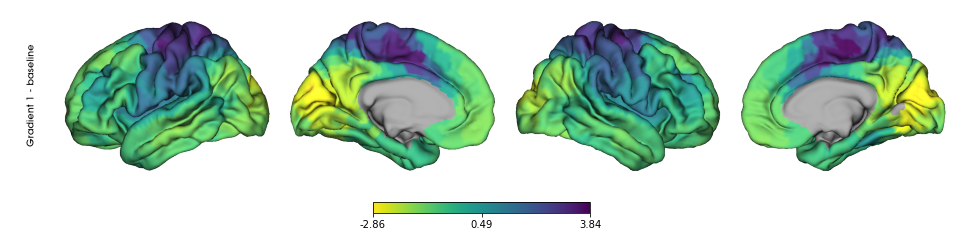

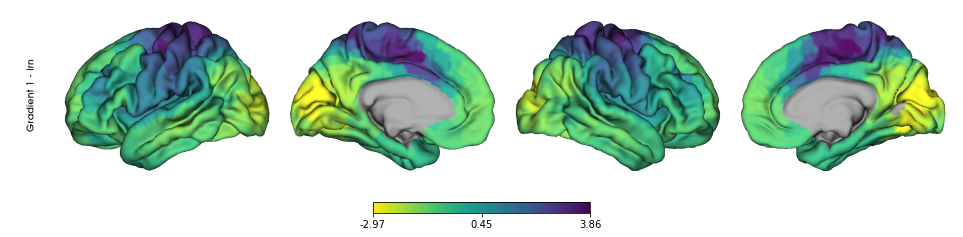

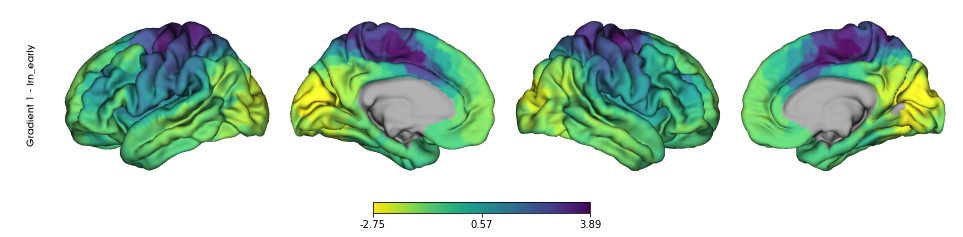

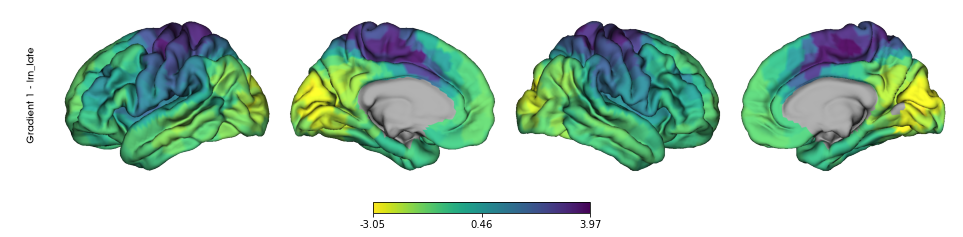

In [69]:
get_gradient_component(component_num=1)
# component_num=0 denotes index -1 which is last (4th) component

## gradient 2

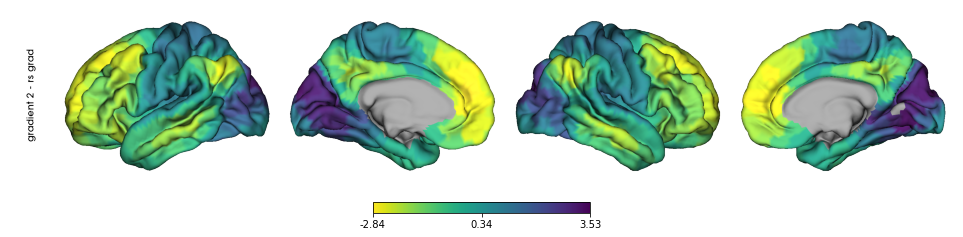

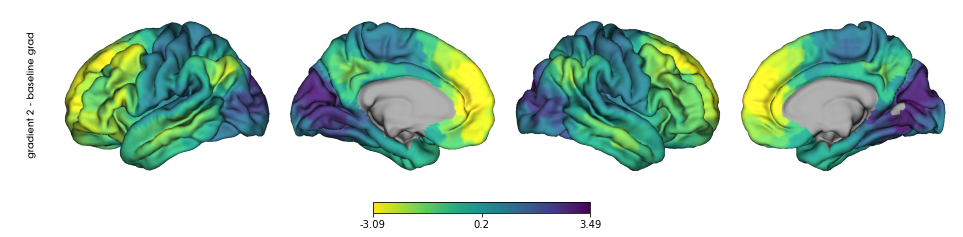

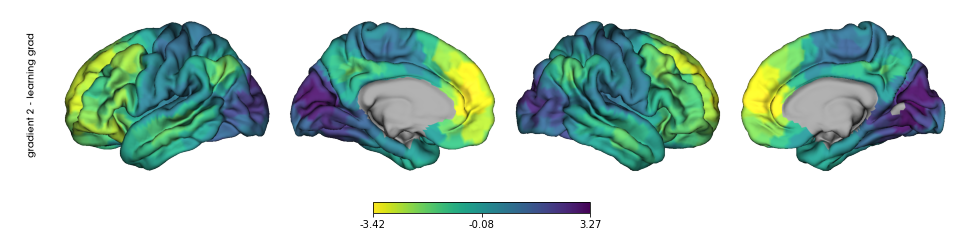

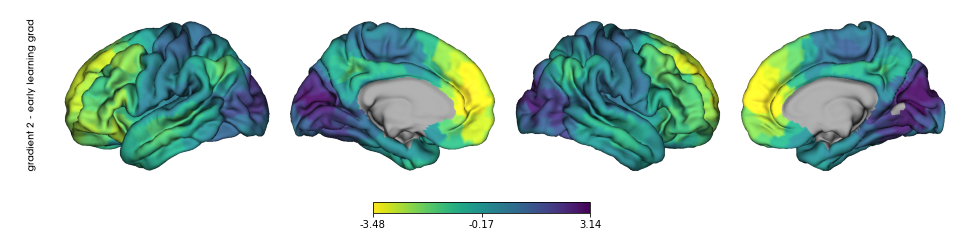

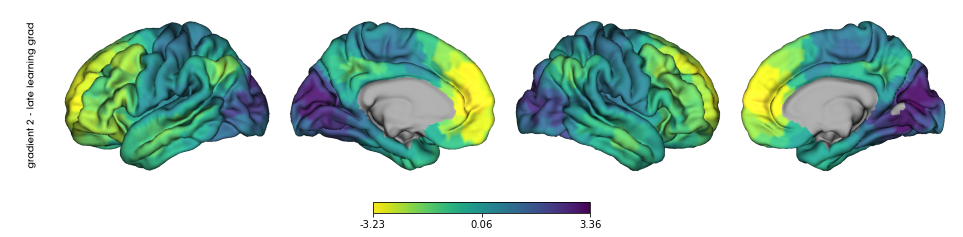

In [34]:
get_gradient_component(component_num=2)

## gradient 3

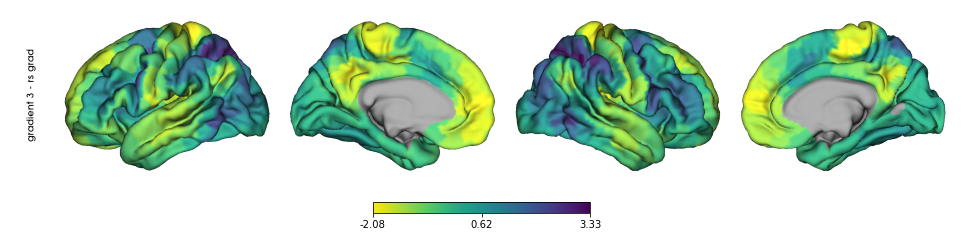

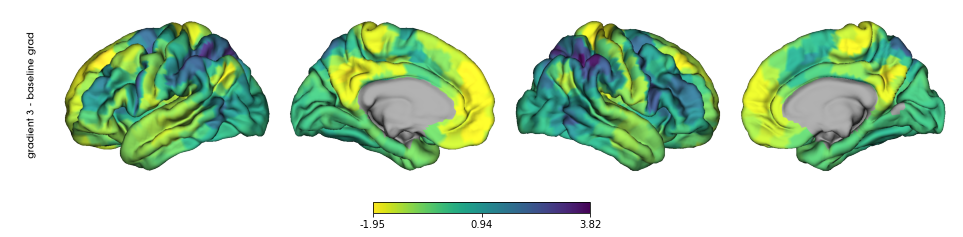

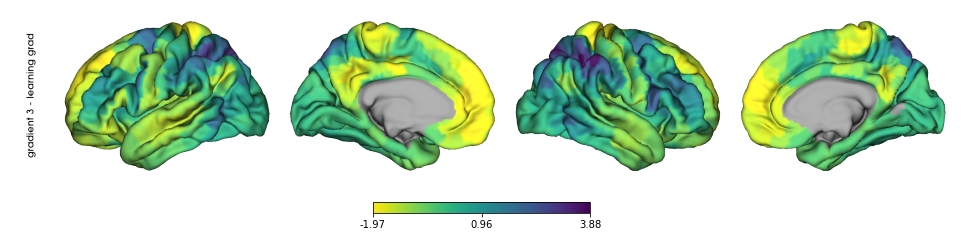

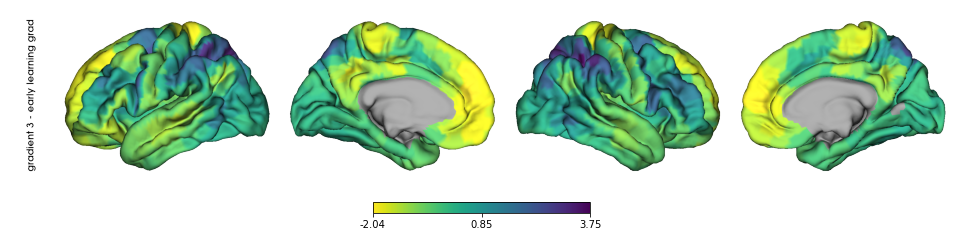

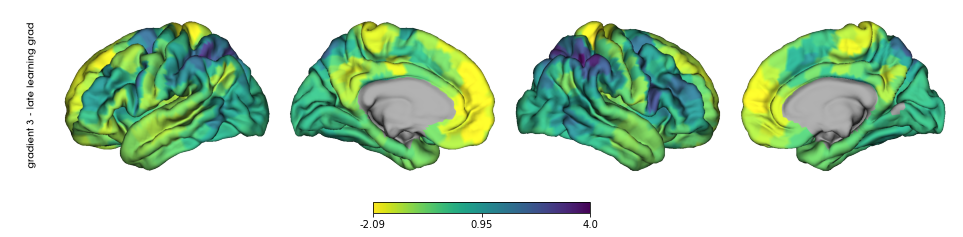

In [32]:
get_gradient_component(component_num=3)

## gradient 4

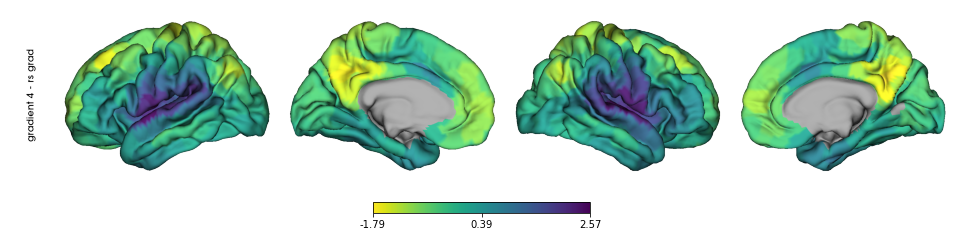

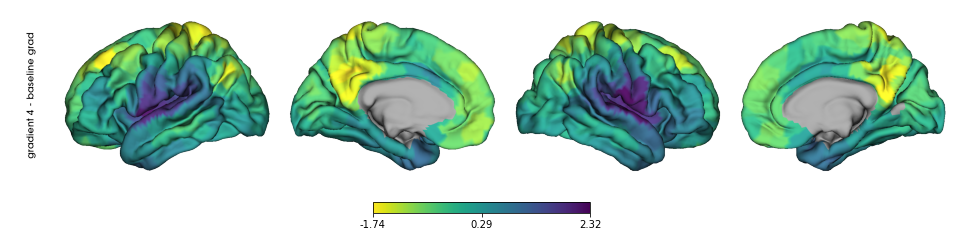

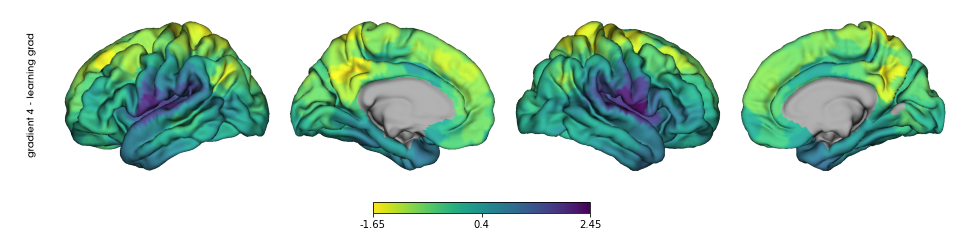

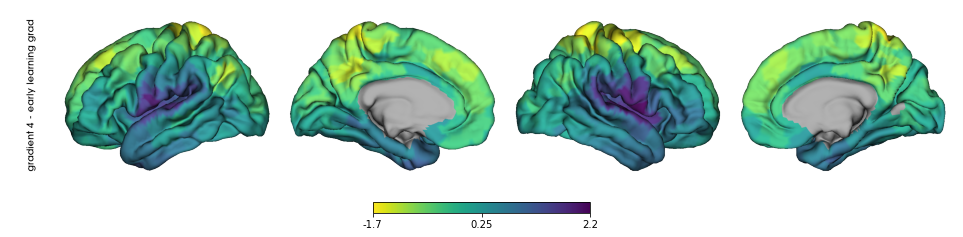

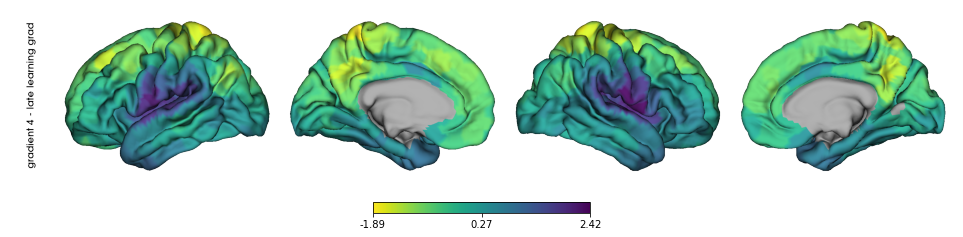

In [33]:
get_gradient_component(component_num=4)

In [ ]:
# anova on ecc of epics

# adding up first 3 components (eccentricity)

In [71]:
ecc = {epic: np.zeros((998,)) for epic in EPICS}

for epic in EPICS:
    for component_num in range(3):
        ecc[epic] += mean_grads[component_num][epic] ** 2
    ecc[epic] = np.sqrt(ecc[epic])

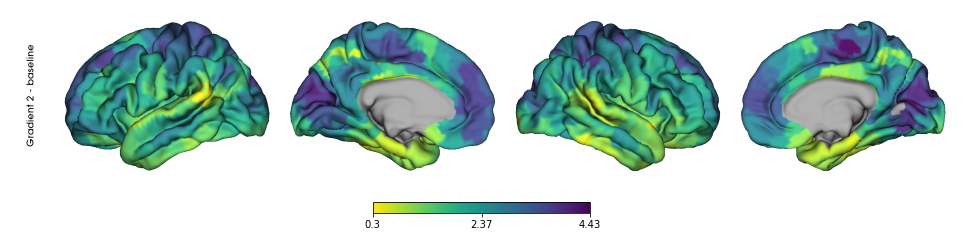

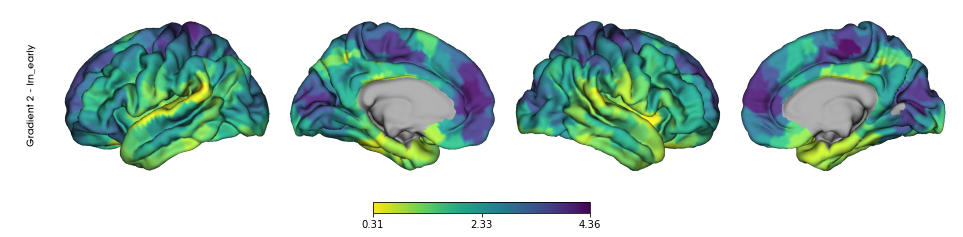

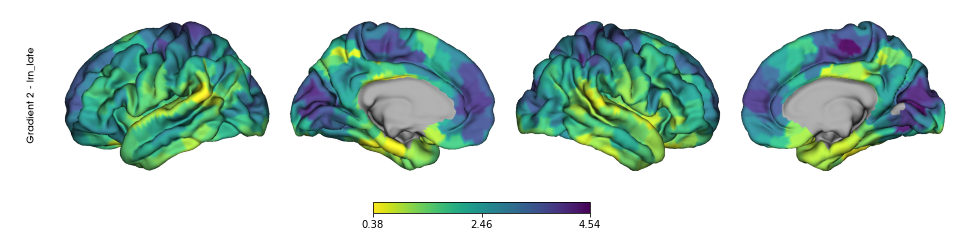

In [74]:
ecc_show = {}

for epic in EPICS:
    ecc_show[epic] = map_to_labels(ecc[epic],
    surf_labels, mask=mask_removed, fill=np.nan)

data = [ecc_show[epic] for epic in EPICS]
texts = EPICS
color_maps = ['viridis_r'] * len(EPICS)
z = zip(data, texts, color_maps)

# remove epics `rest` and `learning` to show
z = list(z)
del z[0], z[1] 


for data_to_show, text_bar, color_map in z:
    stack_surfplot(data_to_show, 'Gradient ' + str(component_num) + ' - ' + text_bar, color_map)